In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras

In [2]:
train = pd.read_csv('datafiles/train.csv')
train.columns = [col.lower() for col in train.columns]

x = train.drop(['survived','name', 'ticket', 'cabin', 'passengerid'], axis = 1)
y = train[['survived']]

In [3]:
# convert to numbers
x['sex'] = x['sex'].replace({'male' : 1, 'female' : 2})
dummied = pd.get_dummies(x)

# age has some null values. this will be a problem for the network. we'll fill them with the column mean
imputer = SimpleImputer()
filled = imputer.fit_transform(dummied)
filled_df = pd.DataFrame(data = filled, index = dummied.index, columns = dummied.columns)

# scale
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(filled_df)
scaled = pd.DataFrame(data = scaled_data, index = filled_df.index, columns = filled_df.columns)

In [4]:
scaled.head()

pclass  sex       age  sibsp  parch      fare  embarked_C  embarked_Q  \
0     1.0  0.0  0.271174  0.125    0.0  0.014151         0.0         0.0   
1     0.0  1.0  0.472229  0.125    0.0  0.139136         1.0         0.0   
2     1.0  1.0  0.321438  0.000    0.0  0.015469         0.0         0.0   
3     0.0  1.0  0.434531  0.125    0.0  0.103644         0.0         0.0   
4     1.0  0.0  0.434531  0.000    0.0  0.015713         0.0         0.0   

   embarked_S  
0         1.0  
1         0.0  
2         1.0  
3         1.0  
4         1.0

In [5]:
model = keras.models.Sequential() # a sequential model is the simplest neural network

# ADD LAYERS

# layer one is the input layer, it should have as many neurones as features
model.add(keras.layers.Dense(8)) 

# not sure about this layer. We probably don't need a hidden layer for so simple a dataset, but it's nice to try
model.add(keras.layers.Dense(6))

# the last layer is the outcome layer. This is a classification task with two outcomes, so we're using a sigmoid activator
model.add(keras.layers.Dense(1, activation = 'sigmoid')) 

# configure how the model learns
model.compile(optimizer = 'SGD', # standard gradient descent
             loss = 'binary_crossentropy', # this is the default loss function for a binary outcome. A lower score is better.
             metrics = ['accuracy']) # the performance metric that we will report

# 'loss' is not the same as 'metrics' - the former is what we report, the latter is what the optimizer tries to decrease.
# so they're similar but not the same

In [6]:
# if you re-run this cell multiple times, the performance metrics improve. The model remembers past trainings!
# of course, this likely means we'd be overfitting to the training data.
training = model.fit(x = np.array(scaled), # keras can return a history object so we can see info about the training process
                     y = np.array(y), # keras likes arrays, not pandas dataframes
                     verbose = 0,
                     validation_split = 0.2,
                     epochs = 100) # epochs is how many iterations we'll do on our data. it defaults to one. 

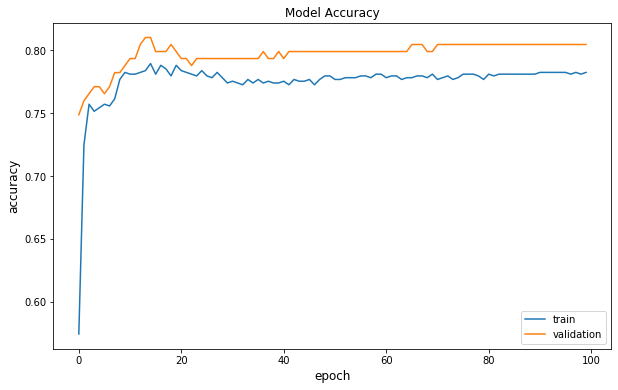

In [12]:
# we just did 100 epochs (iterations), which could be overfitting. Let's have a look at how train and validation accuracy 
    # changes over time
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(training.history['accuracy'])
ax.plot(training.history['val_accuracy'])
ax.set_title('Model Accuracy')
ax.set_ylabel('accuracy', size = 12)
ax.set_xlabel('epoch', size = 12)
ax.legend(['train', 'validation'], loc='lower right')

plt.savefig("model_accuracy.png")
plt.show();

In [8]:
# ok so we actually only need about 15-20 epochs. After this we see a slight decline, as we begin to overfit.